In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import  shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import pickle
from sklearn.manifold import TSNE
import csv
from scipy import sparse


c:\users\ak055384\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cd C:\\Users\\ak055384\\Documents\\HIMClaims\\Visualization

C:\Users\ak055384\Documents\HIMClaims\Visualization


In [3]:
def read_codes():
    df = pd.read_csv("./diag_codes.csv")
    diag_codes = df['CODE'].astype(str)
    codesDict= dict()
    k=0
    codesDict['NA'] =k
    for j in range(len(diag_codes)):
        k = k+1
        codesDict[diag_codes[j]] = k        
    df1 = pd.read_csv("./proc_codes.csv")
    proc_codes = df1['CODE'].astype(str)
    proc_codes1 = df1['CODE1'].astype(str)
    procCodesDict= dict()
    procCodesDict['NA'] =0
    for j in range(len(proc_codes)):
        k = k+1
        procCodesDict[proc_codes[j]] = k    
        k=k+1
        procCodesDict[proc_codes1[j]] = k   
    return (codesDict, procCodesDict)

sess = tf.Session()
codesDict, procCodesDict = read_codes()

len(codesDict)

14380

In [4]:
len(procCodesDict)

7546

In [5]:
logPath = "./tb_logs"
n_class = 100
n_features = 1500

def read_claims_data(codesDict, procCodesDict, sess):
    claims_1 = pd.read_csv("DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv",sep =",",encoding = 'utf8')
    frames = [claims_1]
    claims = pd.concat(frames)
    claims1 = claims[['CLM_DRG_CD',
    'ADMTNG_ICD9_DGNS_CD',
    'ICD9_DGNS_CD_1',
    'ICD9_DGNS_CD_2',
    'ICD9_DGNS_CD_3',
    'ICD9_DGNS_CD_4',
    'ICD9_DGNS_CD_5',
    'ICD9_DGNS_CD_6',
    'ICD9_DGNS_CD_7',
    'ICD9_DGNS_CD_8',
    'ICD9_DGNS_CD_9',
    'ICD9_DGNS_CD_10',
    'ICD9_PRCDR_CD_1',
    'ICD9_PRCDR_CD_2',
    'ICD9_PRCDR_CD_3',
    'ICD9_PRCDR_CD_4',
    'ICD9_PRCDR_CD_5',
    'ICD9_PRCDR_CD_6']]
    claims1 = claims1.fillna('NA')
    claims1 =  claims1[claims1.CLM_DRG_CD.str.contains("OTH") == False]
    claims1 =  claims1[claims1.CLM_DRG_CD.str.match("0") == False] 
    claims1['CLM_DRG_CD'] = pd.to_numeric(claims1['CLM_DRG_CD'], errors='ignore').astype(int)
    claims1['ADMTNG_ICD9_DGNS_CD'] = claims1['ADMTNG_ICD9_DGNS_CD'].astype(str)
    claims1['ADMTNG_ICD9_DGNS_CD'] = claims1['ADMTNG_ICD9_DGNS_CD'].str.strip().str.replace('.', '')
    claims1['ADMTNG_ICD9_DGNS_CD'] = [codesDict.get(item,item) for item in claims1['ADMTNG_ICD9_DGNS_CD']]   
    for j in range(1,11):
        claims1['ICD9_DGNS_CD_' + str(j)] = claims1['ICD9_DGNS_CD_' + str(j)].astype(str)
        claims1['ICD9_DGNS_CD_' + str(j)] = claims1['ICD9_DGNS_CD_' + str(j)].str.strip().str.replace('.', '')
        claims1['ICD9_DGNS_CD_' + str(j)] = [codesDict.get(item,item) for item in claims1['ICD9_DGNS_CD_' + str(j)]]
    for j in range(1,7):
        claims1['ICD9_PRCDR_CD_' + str(j)] = claims1['ICD9_PRCDR_CD_' + str(j)].astype(str)
        claims1['ICD9_PRCDR_CD_' + str(j)] = claims1['ICD9_PRCDR_CD_' + str(j)].str.strip().str.replace('.', '')
        claims1['ICD9_PRCDR_CD_' + str(j)] = [procCodesDict.get(item,item) for item in claims1['ICD9_PRCDR_CD_' + str(j)]]
    for j in range(1,7):
        claims1['ICD9_PRCDR_CD_' + str(j)] = [codesDict.get(item,item) for item in claims1['ICD9_PRCDR_CD_' + str(j)]]
    claims1['ICD9_DGNS_CD_1'] = pd.to_numeric(claims1['ICD9_DGNS_CD_1'], errors='ignore').astype(int)  
    claims1['ICD9_DGNS_CD_2'] = pd.to_numeric(claims1['ICD9_DGNS_CD_2'], errors='ignore').astype(int) 
    claims1['ICD9_DGNS_CD_3'] = pd.to_numeric(claims1['ICD9_DGNS_CD_3'], errors='ignore').astype(int) 
    claims1['ICD9_DGNS_CD_4'] = pd.to_numeric(claims1['ICD9_DGNS_CD_4'], errors='ignore').astype(int) 
    claims1['ICD9_DGNS_CD_5'] = pd.to_numeric(claims1['ICD9_DGNS_CD_5'], errors='ignore').astype(int) 
    claims1['ICD9_DGNS_CD_6'] = pd.to_numeric(claims1['ICD9_DGNS_CD_6'], errors='ignore').astype(int) 
    claims1['ICD9_DGNS_CD_7'] = pd.to_numeric(claims1['ICD9_DGNS_CD_7'], errors='ignore').astype(int) 
    claims1['ICD9_DGNS_CD_8'] = pd.to_numeric(claims1['ICD9_DGNS_CD_8'], errors='ignore').astype(int) 
    claims1['ICD9_DGNS_CD_9'] = pd.to_numeric(claims1['ICD9_DGNS_CD_9'], errors='ignore').astype(int) 
    claims1['ICD9_DGNS_CD_10'] = pd.to_numeric(claims1['ICD9_DGNS_CD_10'], errors='ignore').astype(int) 
    claims1['ICD9_PRCDR_CD_1'] = pd.to_numeric(claims1['ICD9_PRCDR_CD_1'], errors='ignore').astype(int)  
    claims1['ICD9_PRCDR_CD_2'] = pd.to_numeric(claims1['ICD9_PRCDR_CD_2'], errors='ignore').astype(int) 
    claims1['ICD9_PRCDR_CD_3'] = pd.to_numeric(claims1['ICD9_PRCDR_CD_3'], errors='ignore').astype(int) 
    claims1['ICD9_PRCDR_CD_4'] = pd.to_numeric(claims1['ICD9_PRCDR_CD_4'], errors='ignore').astype(int) 
    claims1['ICD9_PRCDR_CD_5'] = pd.to_numeric(claims1['ICD9_PRCDR_CD_5'], errors='ignore').astype(int) 
    claims1['ICD9_PRCDR_CD_6'] = pd.to_numeric(claims1['ICD9_PRCDR_CD_6'], errors='ignore').astype(int)   
    return claims1

claims1= read_claims_data(codesDict, procCodesDict, sess)
claims1.shape

(66280, 18)

In [6]:
claims = claims1[['CLM_DRG_CD',
'ADMTNG_ICD9_DGNS_CD',
'ICD9_DGNS_CD_1',
'ICD9_DGNS_CD_2',
'ICD9_DGNS_CD_3',
'ICD9_DGNS_CD_4',
'ICD9_DGNS_CD_5',
'ICD9_DGNS_CD_6',
'ICD9_DGNS_CD_7',
'ICD9_DGNS_CD_8',
'ICD9_DGNS_CD_9',
'ICD9_DGNS_CD_10',
'ICD9_PRCDR_CD_1',
'ICD9_PRCDR_CD_2',
'ICD9_PRCDR_CD_3',
'ICD9_PRCDR_CD_4',
'ICD9_PRCDR_CD_5',
'ICD9_PRCDR_CD_6']]
claims.head()

,CLM_DRG_CD,ADMTNG_ICD9_DGNS_CD,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6
0,217,5096,9285,9440,14129,4837,2499,4666,14130,8450,13238,0,0,0,0,0,0,0
1,201,9412,1635,4666,6017,9362,2555,7893,2503,1654,6014,0,0,0,0,0,0,0
2,750,6255,6255,2788,5840,0,0,0,0,0,0,0,19214,6255,14324,0,0,0
3,883,2844,2867,3003,7981,3479,13864,3274,0,0,0,0,0,0,0,0,0,0
4,983,6014,3599,4666,3576,14692,9440,2453,9359,9390,4824,0,0,13024,0,0,0,0


In [7]:
claims.describe()

,CLM_DRG_CD,ADMTNG_ICD9_DGNS_CD,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6
count,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000,66280.000000
mean,433.086135,6947.961678,5897.389906,5810.099185,5797.863594,5680.265857,5491.292577,5191.662628,4813.025935,4446.306669,4001.387538,499.153214,10891.394734,3103.842637,1978.282559,1269.925664,875.420715,633.684777
std,264.406632,3016.435945,3086.355148,3568.918629,3640.907711,3723.560233,3810.749650,3895.486848,3958.886255,4049.221802,4046.431327,1984.014023,9538.941083,5536.344978,4659.441528,3840.463762,3236.497379,2794.624241
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.000000,4837.000000,4734.000000,2927.000000,2844.000000,2699.000000,2638.750000,2544.000000,2358.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,353.000000,6112.000000,5253.000000,4826.000000,4826.000000,4826.000000,4810.000000,4740.000000,4687.000000,4666.000000,3051.000000,0.000000,16840.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,638.000000,9397.000000,7654.000000,6121.000000,6572.500000,6136.000000,6110.000000,6059.000000,6018.000000,5968.250000,5620.000000,0.000000,19868.000000,4737.000000,0.000000,0.000000,0.000000,0.000000
max,999.000000,14531.000000,14530.000000,14692.000000,14692.000000,14692.000000,14692.000000,14692.000000,14693.000000,14692.000000,14692.000000,14692.000000,43230.000000,22521.000000,22519.000000,22507.000000,22501.000000,22493.000000


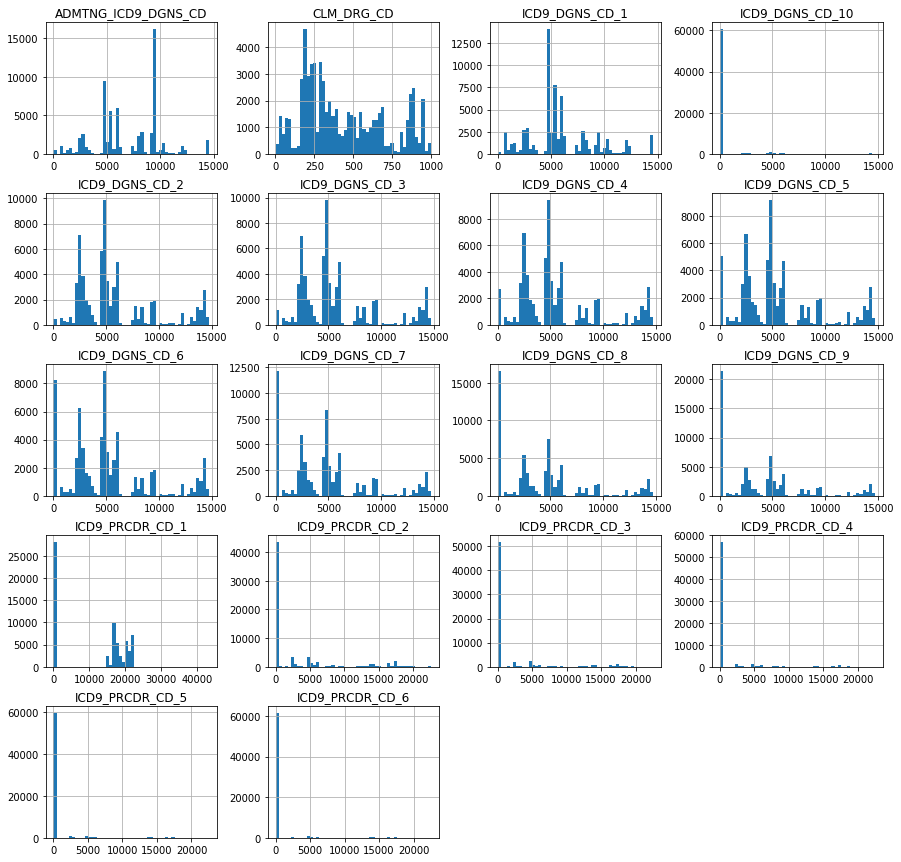

In [8]:
%matplotlib inline
claims1.hist(bins=50, figsize=(15,15))
plt.show()

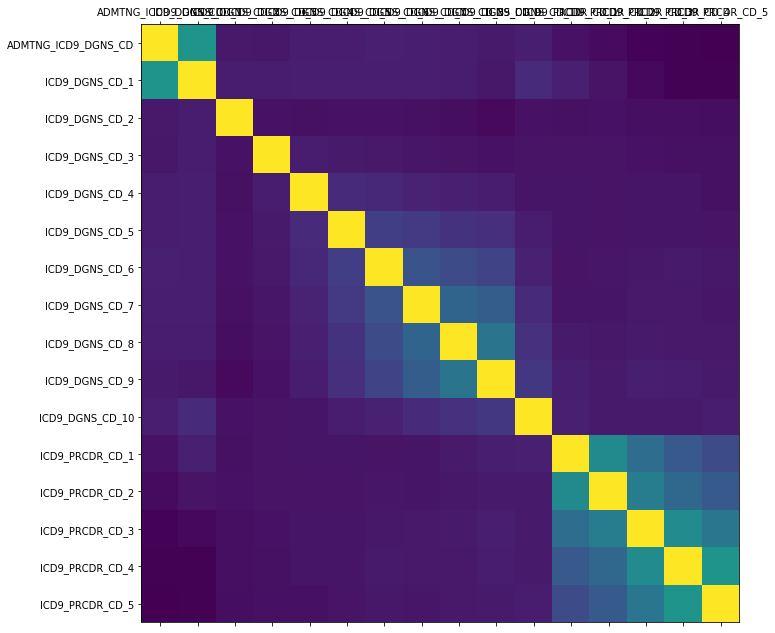

In [9]:
claims2 = claims1[claims1.columns[1:17]]
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
    
plot_corr(claims2)

In [9]:
claims = pd.read_csv("DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv",sep =",",encoding = 'utf8')

Text(0.5,1,'Grouper(DRG)')

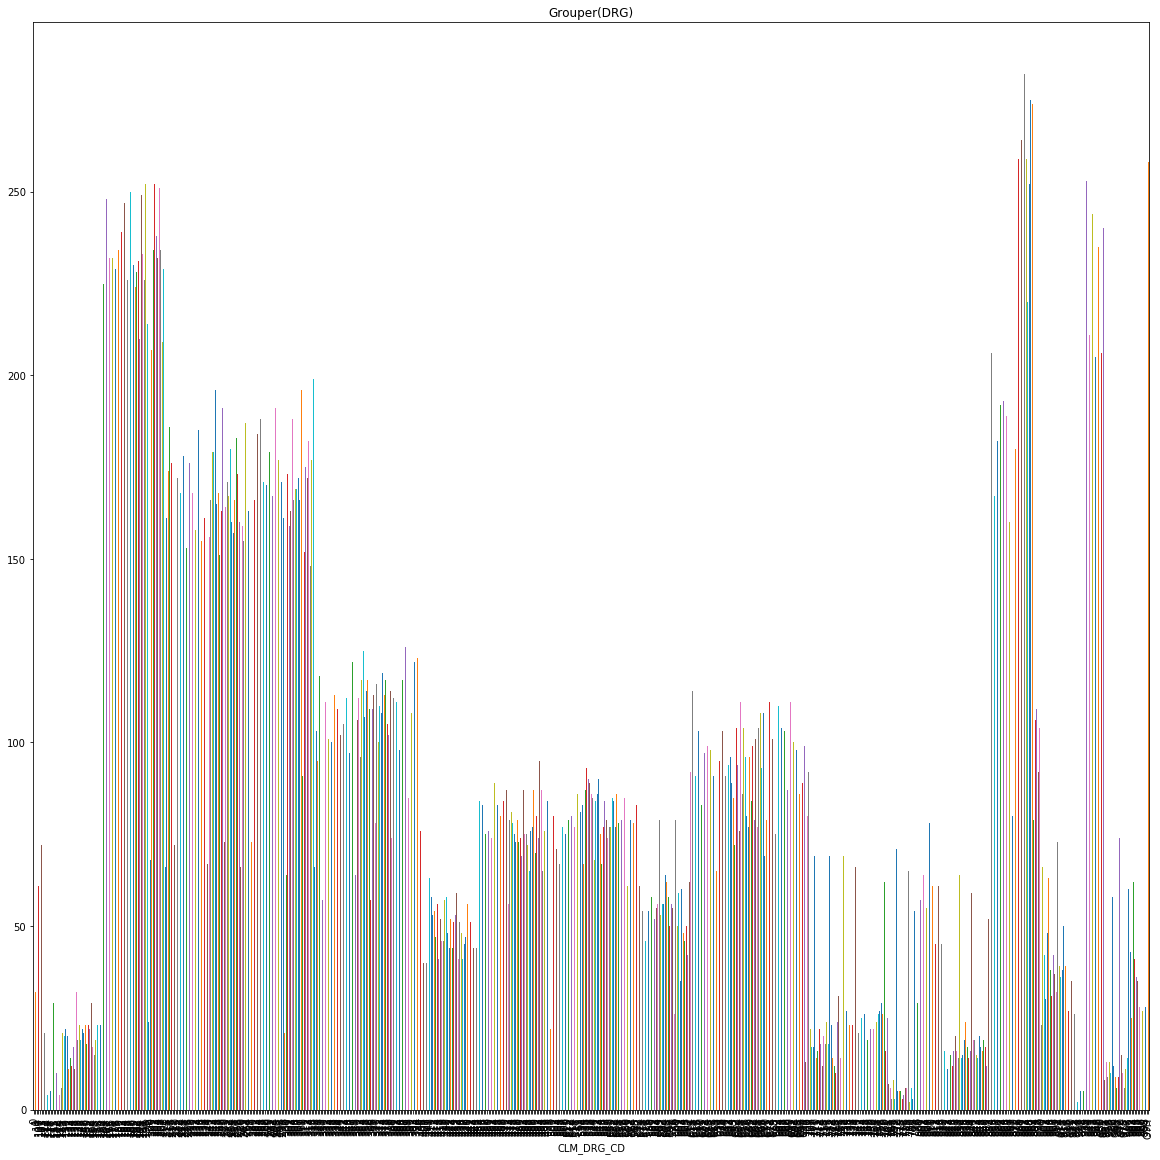

In [10]:
targetName = 'CLM_DRG_CD'
claimsAgg = claims.groupby(targetName)['CLM_ID'].aggregate(len)
claimsAgg.plot(kind='bar', grid=False, figsize=(20,20)).set_title('Grouper(DRG)')

In [11]:
claims.groupby(targetName)['CLM_ID'].aggregate(len)

CLM_DRG_CD
0      235.0
1       32.0
10      30.0
100     61.0
101     61.0
102     72.0
103     52.0
11      21.0
113      4.0
114      4.0
115      8.0
116      5.0
117     11.0
12      29.0
121      8.0
122     10.0
123      7.0
124      4.0
125      6.0
129     21.0
13      20.0
130     22.0
131     20.0
132     11.0
133     14.0
134     12.0
135     17.0
136     11.0
137     32.0
138     19.0
       ...  
955      8.0
956     13.0
957      9.0
958     13.0
959     10.0
96      58.0
963     12.0
964      9.0
965      6.0
969      9.0
97      74.0
970     15.0
974     10.0
975      6.0
976     11.0
977     14.0
98      60.0
981     43.0
982     25.0
983     62.0
984     41.0
985     36.0
986     35.0
987     28.0
988     42.0
989     27.0
99      64.0
998     28.0
999     38.0
OTH    258.0
Name: CLM_ID, Length: 739, dtype: float64

In [4]:
diag = pd.read_csv("diag_codes.csv", sep=",", encoding = 'utf8')
diag.shape

(14736, 4)

In [5]:
diag.dropna()
diag.shape
print(diag.dtypes)

DIAGNOSIS CODE       object
LONG DESCRIPTION     object
SHORT DESCRIPTION    object
CODE                 object
dtype: object


In [6]:
proc = pd.read_csv("proc_codes.csv", sep=",", encoding = 'utf8')
proc.shape

(3893, 6)

In [7]:
proc.dropna()
proc.shape

(3893, 6)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import time
import re
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
skl_stopwords = text.ENGLISH_STOP_WORDS
myStopwords = set(skl_stopwords)
print(myStopwords)

{'up', 'or', 'own', 'nowhere', 'well', 'back', 'would', 'have', 'about', 'twelve', 'were', 'noone', 'no', 'towards', 'some', 'are', 'thereafter', 'made', 'amoungst', 'upon', 'show', 'been', 'somewhere', 'around', 'next', 'con', 'ours', 'him', 'might', 'system', 'everything', 'here', 'thence', 'whole', 'its', 'interest', 'cant', 'within', 'mostly', 'has', 'eight', 'twenty', 'latterly', 'hereby', 'describe', 'off', 'mine', 'whereby', 'thereby', 'how', 'could', 'bottom', 'ie', 'nine', 'found', 'now', 'call', 'if', 'sixty', 'latter', 'go', 'except', 'on', 'part', 'then', 'anything', 'where', 'whereupon', 'which', 'everyone', 'from', 'their', 'her', 'among', 'cannot', 'few', 'already', 'seem', 'last', 'those', 'you', 'after', 'before', 'the', 'un', 'side', 'others', 'be', 'to', 'third', 'via', 'ourselves', 'else', 'formerly', 'same', 'itself', 'nor', 'therefore', 'onto', 'thin', 'detail', 'every', 'toward', 'not', 'above', 'most', 'even', 'otherwise', 'whence', 'fill', 'yet', 'full', 'someh

In [9]:
ps = PorterStemmer() #define method (http://www.nltk.org/api/nltk.stem.html#nltk.stem.porter.PorterStemmer)
proc['LONG DESCRIPTION'] = proc['LONG DESCRIPTION'].astype(str)
proc['LONG DESCRIPTION'] = [ps.stem(word) for word in proc['LONG DESCRIPTION']] 

In [10]:
diag['LONG DESCRIPTION'] = diag['LONG DESCRIPTION'].astype(str)
diag['LONG DESCRIPTION'] = [ps.stem(word) for word in diag['LONG DESCRIPTION']] 

In [33]:
diag.head(20)

,DIAGNOSIS CODE,LONG DESCRIPTION,SHORT DESCRIPTION,CODE
0,1,cholera due to vibrio cholera,Cholera d/t vib cholerae,1
1,2,cholera due to vibrio cholera,Cholera d/t vib cholerae,2
2,3,cholera due to vibrio cholera,Cholera d/t vib cholerae,3
3,4,cholera due to vibrio cholera,Cholera d/t vib cholerae,4
4,5,cholera due to vibrio cholera,Cholera d/t vib cholerae,5
5,6,cholera due to vibrio cholera,Cholera d/t vib cholerae,6
6,7,cholera due to vibrio cholera,Cholera d/t vib cholerae,7
7,8,cholera due to vibrio cholera,Cholera d/t vib cholerae,8
8,9,cholera due to vibrio cholera,Cholera d/t vib cholerae,9
9,10,cholera due to vibrio cholera,Cholera d/t vib cholerae,10


In [35]:
proc.head(20)

,PROCEDURE CODE,LONG DESCRIPTION,SHORT DESCRIPTION,CODE,CODE1,Unnamed: 5
0,1,therapeutic ultrasound of vessels of head and ...,Ther ult head & neck ves,1,5,5601.0
1,2,therapeutic ultrasound of heart,Ther ultrasound of heart,2,20,5601.0
2,3,therapeutic ultrasound of peripheral vascular ...,Ther ult peripheral ves,3,30,NaN
3,9,other therapeutic ultrasound,Other therapeutic ultsnd,9,90,NaN
4,10,implantation of chemotherapeutic ag,Implant chemothera agent,10,100,NaN
5,11,infusion of drotrecogin alfa (activated),Infus drotrecogin alfa,11,110,NaN
6,12,administration of inhaled nitric oxid,Adm inhal nitric oxide,12,120,NaN
7,13,injection or infusion of nesiritid,Inject/infus nesiritide,13,130,NaN
8,14,injection or infusion of oxazolidinone class o...,Injection oxazolidinone,14,140,NaN
9,15,high-dose infusion interleukin-2 [il-2],High-dose infusion IL-2,15,150,NaN


In [11]:
tfidf = TfidfVectorizer(lowercase = True, 
                        stop_words= skl_stopwords, 
                        max_df=0.95, 
                        min_df=0.001,
                        ngram_range = (1,3))

In [12]:
tfidf_dm1 = tfidf.fit_transform(proc['LONG DESCRIPTION'])

# print matrix shape(s)
print(tfidf_dm1.shape)
names = tfidf.get_feature_names()
print(type(names), len(names))

(3893, 1513)
<class 'list'> 1513


In [13]:
count = np.sum(tfidf_dm1.toarray(), axis = 0).tolist()
print(type(count), len(count))
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(['count'], ascending = False).head(20)

<class 'list'> 1513


,count
repair,87.081458
excision,68.084720
operations,60.350160
removal,57.654232
biopsy,48.759836
insertion,46.330302
specifi,45.137386
incision,43.107763
replacement,40.259989
lesion,39.931220


In [39]:
tfidf_dm2 = tfidf.fit_transform(proc['SHORT DESCRIPTION'])

# print matrix shape(s)
print(tfidf_dm2.shape)
names = tfidf.get_feature_names()
print(type(names), len(names))

(3893, 989)
<class 'list'> 989


In [40]:
count = np.sum(tfidf_dm2.toarray(), axis = 0).tolist()
print(type(count), len(count))
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(['count'], ascending = False).head(20)

<class 'list'> 989


,count
nec,221.723090
nos,80.995895
repair,71.057573
biopsy,56.395089
les,42.920474
incision,39.161916
oth,38.898236
excision,37.339269
op,33.943138
remov,33.125680


In [14]:
tfidf_dm3 = tfidf.fit_transform(diag['LONG DESCRIPTION'])

# print matrix shape(s)
print(tfidf_dm3.shape)
names = tfidf.get_feature_names()
print(type(names), len(names))

(14736, 1793)
<class 'list'> 1793


In [15]:
count = np.sum(tfidf_dm3.toarray(), axis = 0).tolist()
print(type(count), len(count))
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(['count'], ascending = False).head(20)

<class 'list'> 1793


,count
unspecified,455.761382
unspecifi,421.607560
specified,273.212414
mention,205.924552
poisoning,192.487549
open,190.348885
neoplasm,189.827758
compl,174.273656
malignant,172.884204
injury,166.340006


In [16]:
pd.DataFrame(tfidf_dm3.toarray()).to_csv("diag_document_matrix.csv", sep=',', encoding='utf-8')

In [17]:
tfidf_pm3 = tfidf.fit_transform(proc['LONG DESCRIPTION'])

# print matrix shape(s)
print(tfidf_pm3.shape)
names = tfidf.get_feature_names()
print(type(names), len(names))

(3893, 1513)
<class 'list'> 1513


In [18]:
count = np.sum(tfidf_pm3.toarray(), axis = 0).tolist()
print(type(count), len(count))
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(['count'], ascending = False).head(20)

<class 'list'> 1513


,count
repair,87.081458
excision,68.084720
operations,60.350160
removal,57.654232
biopsy,48.759836
insertion,46.330302
specifi,45.137386
incision,43.107763
replacement,40.259989
lesion,39.931220


In [19]:
pd.DataFrame(tfidf_pm3.toarray()).to_csv("proc_document_matrix.csv", sep=',', encoding='utf-8')

In [ ]:
cluster_range = [100,120,150,170,180,200,220,230,250,270,290,300,350,400,500,600,700,900,1000]
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(tfidf_dm3.toarray())
  cluster_errors.append(clusters.inertia_)

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )